In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/koreankiwi99/ada_movie.git
%cd ada_movie

Cloning into 'ada_movie'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (5/5), done.
Receiving objects: 100% (10/10), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
/content/ada_movie


In [ ]:
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
import tarfile
import os
import pandas as pd
from pathlib import Path
from tqdm import tqdm
import json
import sys
import numpy as np
from collections import Counter, defaultdict
import gc
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
from src.dataset.character import CharacterDataset
from src.dataset.event import EventDataset

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
plot_path = '/content/drive/MyDrive/ADA/data/plot_df.csv'
plot_df = pd.read_csv(plot_path)

In [ ]:
plot_df.head(3)

,Wikipedia_movie_ID,Plot
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...


In [ ]:
processed_path = Path('/content/drive/MyDrive/ADA/data/processed/')
plot_path_list = sorted(list(processed_path.glob('*')), key = lambda x : int(x.parts[-1]))

In [ ]:
[int(_.parts[-1]) for _ in plot_path_list] == list(range(42306))

True

# Count DataFrame

In [14]:
gender_count = []
gender_ratio = []
gender_sum_mention = []
gender_ratio_mention = []

for plot_path in tqdm(plot_path_list):
  data = CharacterDataset(plot_path)
  gender_count.append(data.gender_count)
  gender_ratio.append(data.gender_ratio)
  gender_sum_mention.append(data.gender_sum_mention)
  gender_ratio_mention.append(data.gender_ratio_mention)
  del data
  gc.collect()

100%|██████████| 42306/42306 [4:10:01<00:00,  2.82it/s]


In [15]:
gender_count_df = pd.DataFrame(gender_count)
gender_ratio_df = pd.DataFrame(gender_ratio)
gender_sum_mention_df = pd.DataFrame(gender_sum_mention)
gender_ratio_mention_df = pd.DataFrame(gender_ratio_mention)

In [16]:
gender_count_df.fillna(0, inplace=True)
gender_ratio_df.fillna(0, inplace=True)
gender_sum_mention_df.fillna(0, inplace=True)
gender_ratio_mention_df.fillna(0, inplace=True)

In [17]:
gender_count_df.to_csv('/content/drive/MyDrive/ADA/gender_count.csv')
gender_ratio_df.to_csv('/content/drive/MyDrive/ADA/gender_ratio.csv')
gender_sum_mention_df.to_csv('/content/drive/MyDrive/ADA/gender_sum_mention.csv')
gender_ratio_mention_df.to_csv('/content/drive/MyDrive/ADA/gender_ratio_mention.csv')

## Check

In [21]:
print("Gender Count Summary Statistics:\n", gender_count_df.describe())
print("\nGender Ratio Summary Statistics:\n", gender_ratio_df.describe())

Gender Count Summary Statistics:
              plural        female          male       unknown       neutral
count  42306.000000  42306.000000  42306.000000  42306.000000  42306.000000
mean       1.576018      1.443294      2.915071      0.782040      0.000307
std        2.132831      1.682803      2.691584      1.312502      0.017527
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      1.000000      0.000000      0.000000
50%        1.000000      1.000000      2.000000      0.000000      0.000000
75%        2.000000      2.000000      4.000000      1.000000      0.000000
max       27.000000     21.000000     34.000000     17.000000      1.000000

Gender Ratio Summary Statistics:
              plural        female          male       unknown       neutral
count  42306.000000  42306.000000  42306.000000  42306.000000  42306.000000
mean       0.203031      0.215273      0.460112      0.083242      0.000026
std        0.236245

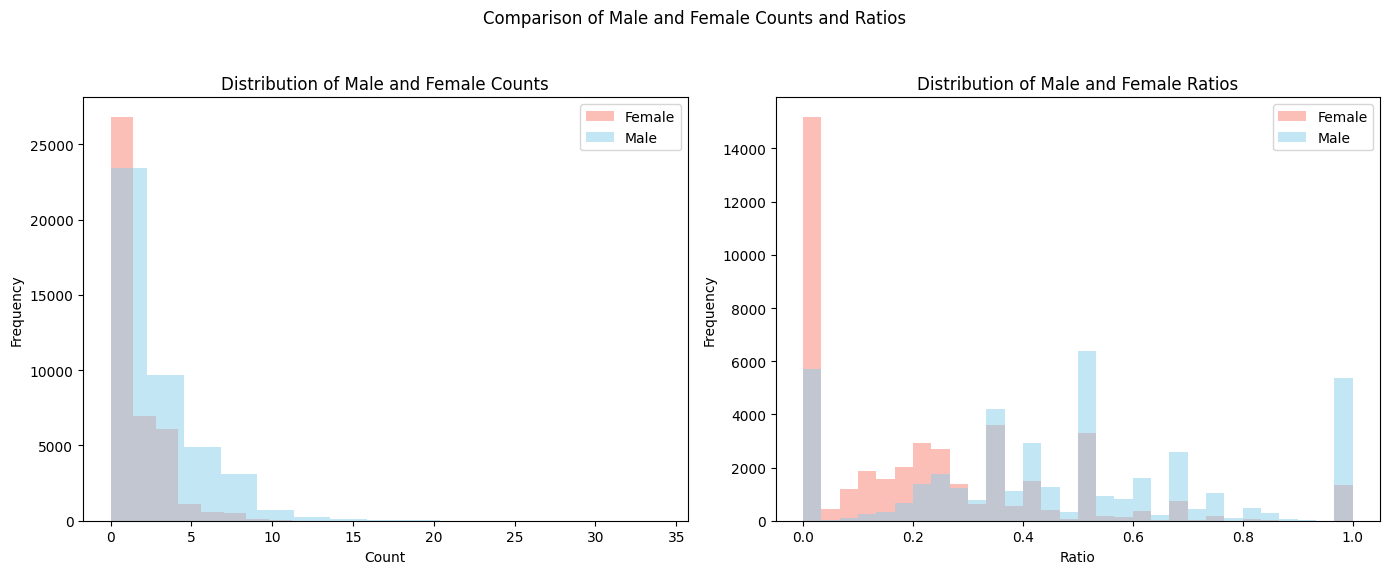

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Counts and Ratios")

# 1. Overlaid Histograms for Counts
axes[0].hist(gender_count_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_count_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Counts")
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Frequency")
axes[0].legend()

# 2. Overlaid Histograms for Ratios
axes[1].hist(gender_ratio_df['female'], bins=30, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_df['male'], bins=30, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratios")
axes[1].set_xlabel("Ratio")
axes[1].set_ylabel("Frequency")
axes[1].legend()

# Show the plots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [23]:
print("\nGender Sum Mention Summary Statistics:\n", gender_sum_mention_df.describe())
print("\nGender Ratio Mention Summary Statistics:\n", gender_ratio_mention_df.describe())


Gender Sum Mention Summary Statistics:
              plural        female          male       unknown       neutral
count  42306.000000  42306.000000  42306.000000  42306.000000  42306.000000
mean       6.267763     12.666359     27.205148      1.898360      0.002080
std       10.985698     22.257394     35.179078      3.402638      0.167986
min        0.000000      0.000000      0.000000      0.000000      0.000000
25%        0.000000      0.000000      4.000000      0.000000      0.000000
50%        2.000000      4.000000     13.000000      0.000000      0.000000
75%        8.000000     15.000000     38.000000      2.000000      0.000000
max      196.000000    405.000000    575.000000     56.000000     29.000000

Gender Ratio Mention Summary Statistics:
              plural        female          male       unknown       neutral
count  42306.000000  42306.000000  42306.000000  42306.000000  42306.000000
mean       2.135659      5.159008      7.334614      0.961573      0.002080
std 

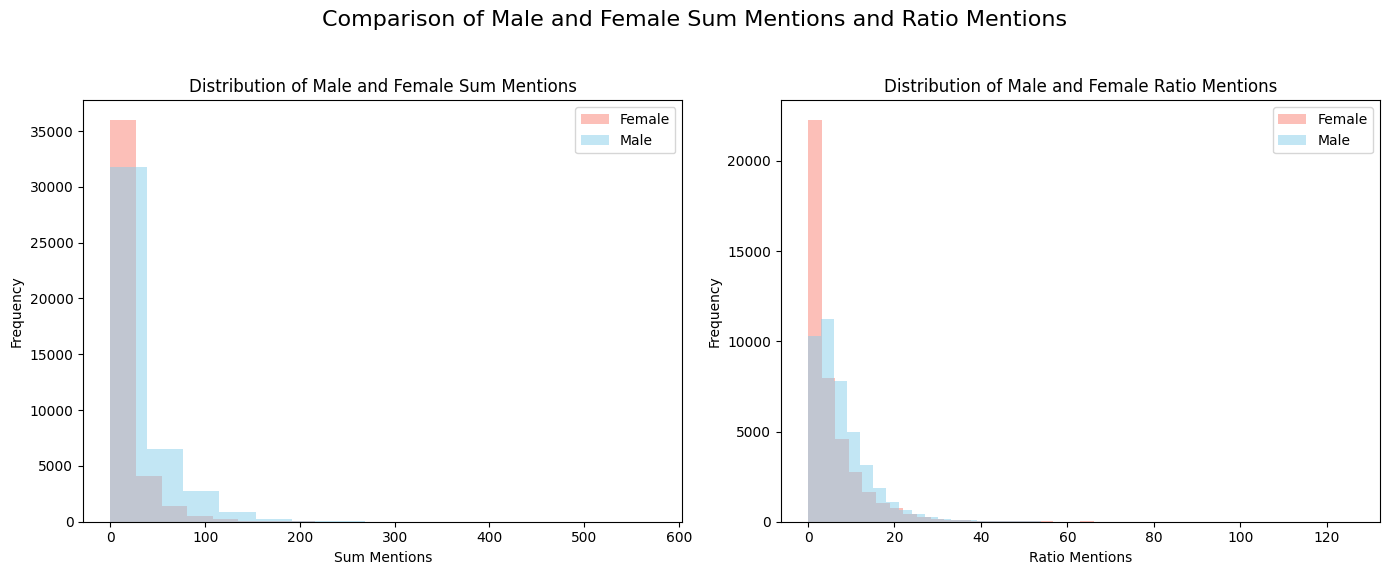

In [27]:
# Plotting male and female comparisons for Sum Mentions and Ratio Mentions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle("Comparison of Male and Female Sum Mentions and Ratio Mentions", fontsize=16)

# 1. Overlaid Histogram for Sum Mentions
axes[0].hist(gender_sum_mention_df['female'], bins=15, alpha=0.5, label='Female', color='salmon')
axes[0].hist(gender_sum_mention_df['male'], bins=15, alpha=0.5, label='Male', color='skyblue')
axes[0].set_title("Distribution of Male and Female Sum Mentions")
axes[0].set_xlabel("Sum Mentions")
axes[0].set_ylabel("Frequency")
axes[0].legend(loc='upper right')

# 2. Overlaid Histogram for Ratio Mentions
axes[1].hist(gender_ratio_mention_df['female'], bins=40, alpha=0.5, label='Female', color='salmon')
axes[1].hist(gender_ratio_mention_df['male'], bins=40, alpha=0.5, label='Male', color='skyblue')
axes[1].set_title("Distribution of Male and Female Ratio Mentions")
axes[1].set_xlabel("Ratio Mentions")
axes[1].set_ylabel("Frequency")
axes[1].legend(loc='upper right')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Related Event Analysis

In [18]:
female_agent_events = []
male_agent_events = []
female_patient_events = []
male_patient_events = []
female_poss_events = []
male_poss_events = []

for plot_path in tqdm(plot_path_list):
  data = EventDataset(plot_path)
  female_agent_events.extend(data.agent_events['female'])
  male_agent_events.extend(data.agent_events['male'])
  female_patient_events.extend(data.patient_events['female'])
  male_patient_events.extend(data.patient_events['male'])
  female_poss_events.extend(data.poss_events['female'])
  male_poss_events.extend(data.poss_events['male'])
  del data
  gc.collect()

100%|██████████| 42306/42306 [2:55:28<00:00,  4.02it/s]


In [19]:
import pickle

In [20]:
with open('/content/drive/MyDrive/ADA/female_agent_events.pkl', 'wb') as f:
  pickle.dump(female_agent_events, f)

with open('/content/drive/MyDrive/ADA/male_agent_events.pkl', 'wb') as f:
  pickle.dump(male_agent_events, f)

with open('/content/drive/MyDrive/ADA/female_patient_events.pkl', 'wb') as f:
  pickle.dump(female_patient_events, f)

with open('/content/drive/MyDrive/ADA/male_patient_events.pkl', 'wb') as f:
  pickle.dump(male_patient_events, f)

with open('/content/drive/MyDrive/ADA/female_poss_events.pkl', 'wb') as f:
  pickle.dump(female_poss_events, f)

with open('/content/drive/MyDrive/ADA/male_poss_events.pkl', 'wb') as f:
  pickle.dump(male_poss_events, f)

In [28]:
def show_wordcloud(male_text : str,
                   female_text : str,
                   title : str,
                   max_words : int = 100):
  wordcloud_female = WordCloud(width=400, height=400, background_color='white', colormap='Reds', max_words=max_words).generate(female_text)
  wordcloud_male = WordCloud(width=400, height=400, background_color='white', colormap='Blues', max_words=max_words).generate(male_text)

  # Display the word clouds side by side
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  fig.suptitle(f"{title} Associated with Female and Male Characters", fontsize=16)

  # Female verbs word cloud
  axes[0].imshow(wordcloud_female, interpolation='bilinear')
  axes[0].set_title("Female Characters")
  axes[0].axis('off')

  # Male verbs word cloud
  axes[1].imshow(wordcloud_male, interpolation='bilinear')
  axes[1].set_title("Male Characters")
  axes[1].axis('off')

  plt.tight_layout()
  plt.show()

### Possessive Words

In [29]:
male_only_poss = set(male_poss_events) - set(female_poss_events)
female_only_poss = set(female_poss_events) - set(male_poss_events)
both_poss = set(male_poss_events) & set(female_poss_events)

In [30]:
male_poss_text = ' '.join([_ for _ in male_poss_events if _ in male_only_poss])
female_poss_text = ' '.join([_ for _ in female_poss_events if _ in female_only_poss])

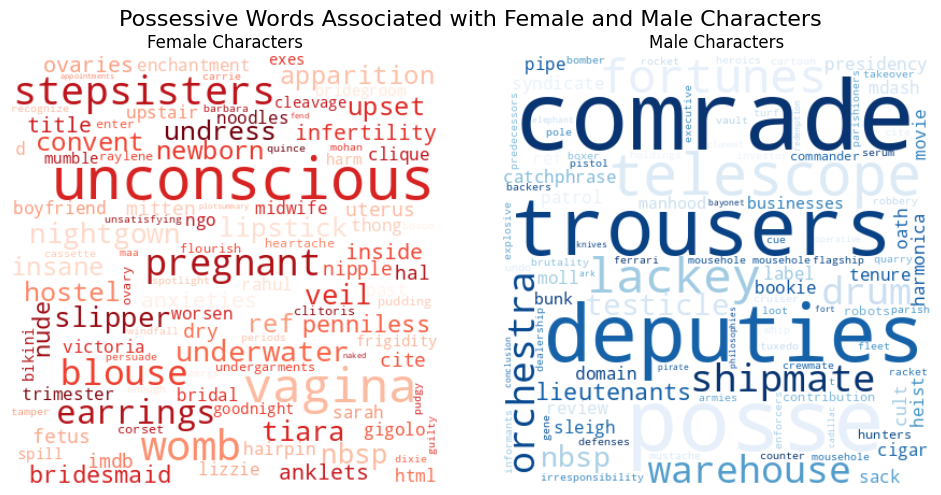

In [31]:
show_wordcloud(male_poss_text,
               female_poss_text,
               "Possessive Words",
               max_words = 100)

### Agent Words




In [32]:
male_only_agent = set(male_agent_events) - set(female_agent_events)
female_only_agent = set(female_agent_events) - set(male_agent_events)
both_agent = set(male_agent_events) & set(female_agent_events)

In [33]:
male_agent_text = ' '.join([_ for _ in male_agent_events if _ in male_only_agent])
female_agent_text = ' '.join([_ for _ in female_agent_events if _ in female_only_agent])

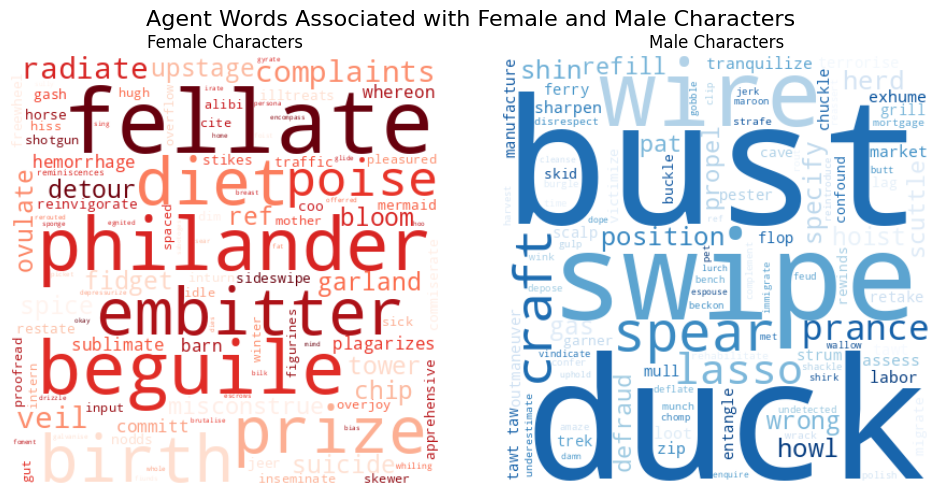

In [34]:
show_wordcloud(male_agent_text, female_agent_text, "Agent Words")

### Patient Words

In [35]:
male_only_patient = set(male_patient_events) - set(female_patient_events)
female_only_patient = set(female_patient_events) - set(male_patient_events)
both_patient = set(male_patient_events) & set(female_patient_events)

In [36]:
male_patient_text = ' '.join([_ for _ in male_patient_events if _ in male_only_patient])
female_patient_text = ' '.join([_ for _ in female_patient_events if _ in female_only_patient])

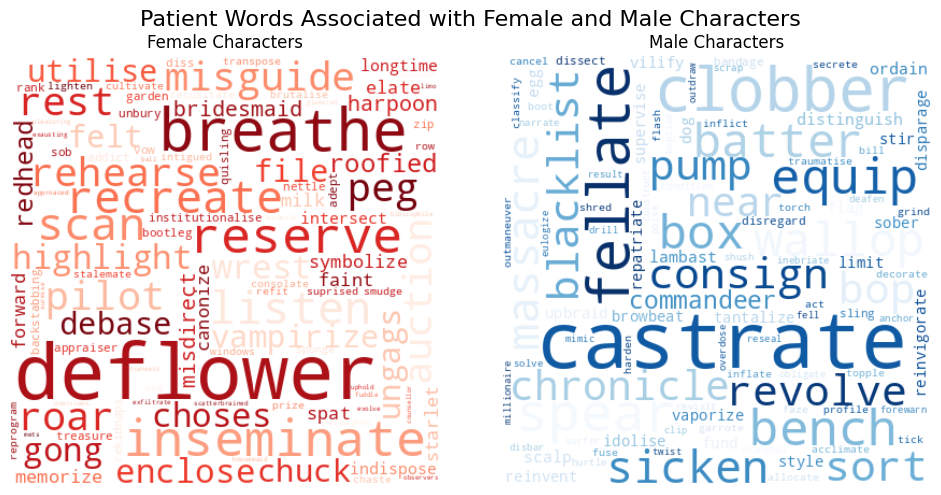

In [37]:
show_wordcloud(male_patient_text, female_patient_text, "Patient Words")